## Make Prediction Using Logistic Regression

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
for j in range(0,df.shape[1]):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

sale_price = df[['SalePrice']].values
sales_attrs = [
    'Id',
    'SalePrice',
    'SaleCondition_Abnorml',
    'SaleCondition_AdjLand',
    'SaleCondition_Alloca',
    'SaleCondition_Family',
    'SaleCondition_Normal',
    'SaleCondition_Partial',
    'SaleType_COD',
    'SaleType_CWD',
    'SaleType_Con',
    'SaleType_ConLD',
    'SaleType_ConLI',
    'SaleType_ConLw',
    'SaleType_New',
    'SaleType_Oth',
    'SaleType_WD']

In [5]:
df.drop(sales_attrs, axis=1, inplace=True)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(df.values)
y = scaler.fit_transform(sale_price.reshape(-1,1))

/Users/joannelam/programs/python/python2env/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
# split into train and test sets
n_train_time = int(len(y)*0.9)

train_x = values[:n_train_time, :]
train_y = y[:n_train_time]
test_x = values[n_train_time:, :]
test_y = y[n_train_time:]

In [8]:
lr = linear_model.LinearRegression()
model = lr.fit(train_x, train_y)

/Users/joannelam/programs/python/python2env/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [9]:
predictions = model.predict(test_x)
actual_values = test_y


R^2 is: 0.8846970494337255
RMSE is: 0.001164844073282223


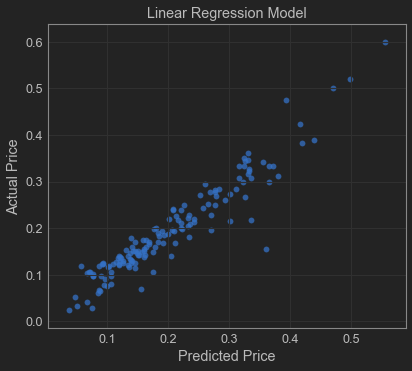

In [10]:
print "\nR^2 is:", model.score(test_x, test_y)
print 'RMSE is:', mean_squared_error(test_y , predictions)

plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()